In [203]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('dark_background')

from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

In [106]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [107]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [108]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract


# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_dates = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==6).all()

# print(june_data)

In [109]:
#  3. Convert the June temperatures to a list.
june_temp = []
june_temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

# print(june_temp)




In [122]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp, columns=['Temperature in June'])
june_temp_df


,Temperature in June
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [123]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.

june_temp_df.describe()

,Temperature in June
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [132]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_dates = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==12).all()

# print(dec_dates)

In [133]:
# 7. Convert the December temperatures to a list.
dec_temp = []
dec_temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

# print(dec_temp)

In [134]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp, columns = ['Temperature in December'])
dec_temp_df

,Temperature in December
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [135]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,Temperature in December
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional Analysis

In [218]:
#Merge and Compare two stats
new_df = pd.merge(june_temp_df.describe(), dec_temp_df.describe(), left_index=True, right_index=True, suffixes=('', '2'))
new_df

,Temperature in June,Temperature in December
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


In [224]:
new_df2 = new_df.drop(index=('count'))
new_df2

,Temperature in June,Temperature in December
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


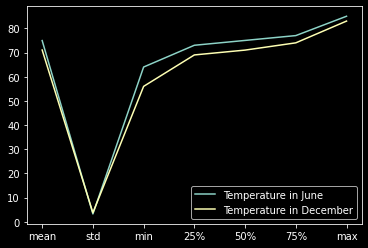

<Figure size 432x288 with 0 Axes>

In [250]:
new_df2.plot()
plt.show()
plt.savefig("../Temperature in June vs December.png")

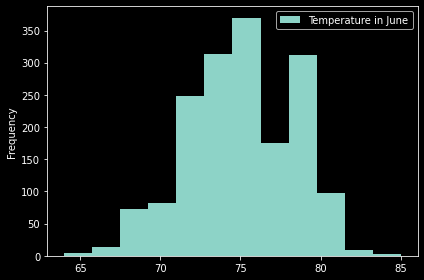

In [242]:
june_temp_df.plot.hist(bins=12)
plt.tight_layout()
plt.savefig("../Temperature in June.png")

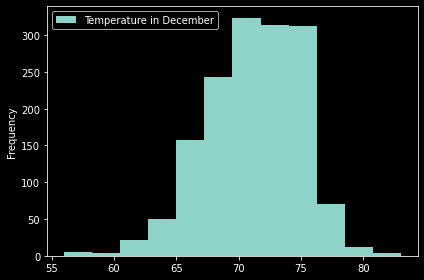

In [243]:
dec_temp_df.plot.hist(bins=12)
plt.tight_layout()
plt.savefig("../Temperature in December.png")

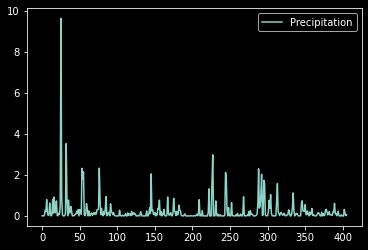

In [249]:
#Precipitation analysis at the most active station:

# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Using the station id from the previous query, calculate the lowest temperature recorded, 

session.query(func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp)).\
filter(Measurement.station == 'USC00519281').all()

# Choose the station with the highest number of temperature observations.

results = session.query(Measurement.prcp).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()


df = pd.DataFrame(results, columns=['Precipitation'])

df.plot();


plt.savefig("../Precipitation analysis.png")